# Visualizing openSmile data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
opensmile_energy_df = pd.read_csv("../../csci_535_interpretable_emotion_recognition_from_audiovisual/opensmile/opensmile.energy.csv", delimiter=";")
opensmile_energy_df

,frameIndex,frameTime,pcm_LOGenergy
0,0,0.00,-13.83729
1,1,0.01,-13.44107
2,2,0.02,-13.62546
3,3,0.03,-13.71792
4,4,0.04,-12.56511
...,...,...,...
197,197,1.97,-12.69979
198,198,1.98,-12.83366
199,199,1.99,-12.74920
200,200,2.00,-12.45687


In [3]:
time_as_index = opensmile_energy_df.set_index('frameTime')
time_as_index

,frameIndex,pcm_LOGenergy
frameTime,,
0.00,0,-13.83729
0.01,1,-13.44107
0.02,2,-13.62546
0.03,3,-13.71792
0.04,4,-12.56511
...,...,...
1.97,197,-12.69979
1.98,198,-12.83366
1.99,199,-12.74920


In [4]:
pcm_by_time = time_as_index.drop(['frameIndex'], axis=1)
pcm_by_time

,pcm_LOGenergy
frameTime,
0.00,-13.83729
0.01,-13.44107
0.02,-13.62546
0.03,-13.71792
0.04,-12.56511
...,...
1.97,-12.69979
1.98,-12.83366
1.99,-12.74920


In [5]:
pcm_by_time

,pcm_LOGenergy
frameTime,
0.00,-13.83729
0.01,-13.44107
0.02,-13.62546
0.03,-13.71792
0.04,-12.56511
...,...
1.97,-12.69979
1.98,-12.83366
1.99,-12.74920


<AxesSubplot: xlabel='frameTime'>

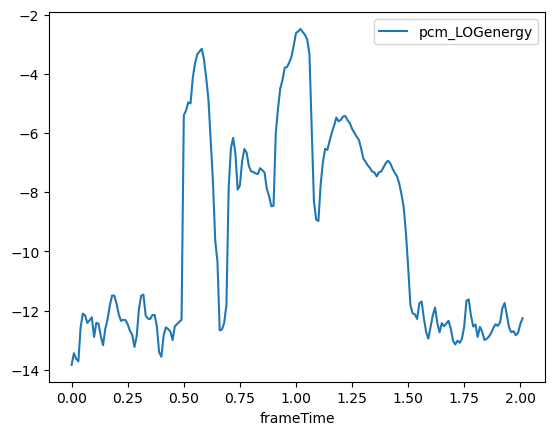

In [6]:
pcm_by_time.plot()

## gnuplot

In [7]:
# This loads the gnuplot kernel extension, for embedded gnuplot use
%load_ext gnuplot_kernel
%gnuplot inline pngcairo size 640,480 font "Palatino,16"

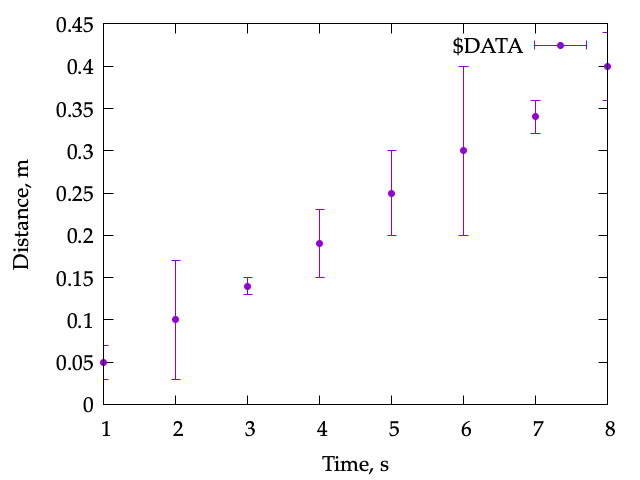

In [8]:
%%gnuplot
$DATA << EOD
1 0.05 0.02
2 0.10 0.07
3 0.14 0.01
4 0.19 0.04
5 0.25 0.05
6 0.30 0.10
7 0.34 0.02
8 0.40 0.04
EOD

set xlabel 'Time, s'
set ylabel 'Distance, m'
plot $DATA with errorbars pt 7

In [9]:
path = "/Users/brinkley97/Documents/development/classes/csci_535_interpretable_emotion_recognition_from_audiovisual/opensmile/"

In [10]:
opensmile_energy_df = pd.read_csv("../../csci_535_interpretable_emotion_recognition_from_audiovisual/opensmile/chroma.csv", delimiter=";")
opensmile_energy_df

,5.344708e-02,8.692870e-02,9.757580e-02,2.963729e-02,1.166666e-01,5.127192e-02,9.780104e-02,7.548714e-02,8.867323e-02,1.242342e-01,1.025194e-01,7.575766e-02
0,0.034618,0.083598,0.109657,0.033619,0.144019,0.057417,0.076431,0.092782,0.072930,0.110226,0.092285,0.092418
1,0.071062,0.055861,0.158145,0.049759,0.136723,0.078055,0.078298,0.082767,0.052020,0.078027,0.075665,0.083617
2,0.081133,0.035736,0.168114,0.046858,0.132720,0.077885,0.097584,0.067782,0.074447,0.087529,0.058250,0.071961
3,0.078408,0.060592,0.157802,0.047667,0.120155,0.075643,0.091484,0.057588,0.101254,0.090779,0.047243,0.071386
4,0.084496,0.072086,0.130038,0.052907,0.088294,0.077811,0.100808,0.046494,0.118264,0.092002,0.049955,0.086845
...,...,...,...,...,...,...,...,...,...,...,...,...
192,0.086053,0.082079,0.174104,0.048040,0.087135,0.060323,0.095482,0.080144,0.077711,0.077817,0.074148,0.056964
193,0.085455,0.074495,0.177341,0.044750,0.107945,0.061767,0.083045,0.080301,0.102280,0.057205,0.076444,0.048970
194,0.077729,0.054765,0.174809,0.040888,0.102479,0.059954,0.109801,0.059543,0.130107,0.065900,0.068633,0.055393
195,0.067157,0.037205,0.200579,0.045112,0.081679,0.067833,0.115283,0.035743,0.128707,0.086433,0.073797,0.060473


In [11]:
def reformat_df(df):
    """
    df -- pandas df
    """
    
    drop_cols = df.iloc[0:, 0:2]
    # drop_cols
    
    df_no_col = df.drop(drop_cols, axis=1)
    # df_no_col
    
    reformatted_df = df_no_col.loc[1:, ]
    # reformatted_df
    
    return reformatted_df

In [12]:
spectrogram_df = pd.read_csv("../../csci_535_interpretable_emotion_recognition_from_audiovisual/opensmile/spectrogram.csv", delimiter=";")
spectrogram_df

,9.757580e-02,2.963729e-02,1.166666e-01,5.127192e-02,9.780104e-02,7.548714e-02,8.867323e-02,1.242342e-01,1.025194e-01,7.575766e-02
0,0.158145,0.049759,0.136723,0.078055,0.078298,0.082767,0.052020,0.078027,0.075665,0.083617
1,0.168114,0.046858,0.132720,0.077885,0.097584,0.067782,0.074447,0.087529,0.058250,0.071961
2,0.157802,0.047667,0.120155,0.075643,0.091484,0.057588,0.101254,0.090779,0.047243,0.071386
3,0.130038,0.052907,0.088294,0.077811,0.100808,0.046494,0.118264,0.092002,0.049955,0.086845
4,0.147024,0.041890,0.056494,0.077258,0.114433,0.034632,0.103184,0.110956,0.067190,0.094509
...,...,...,...,...,...,...,...,...,...,...
191,0.174104,0.048040,0.087135,0.060323,0.095482,0.080144,0.077711,0.077817,0.074148,0.056964
192,0.177341,0.044750,0.107945,0.061767,0.083045,0.080301,0.102280,0.057205,0.076444,0.048970
193,0.174809,0.040888,0.102479,0.059954,0.109801,0.059543,0.130107,0.065900,0.068633,0.055393
194,0.200579,0.045112,0.081679,0.067833,0.115283,0.035743,0.128707,0.086433,0.073797,0.060473


In [13]:
reformatted_opensmile_energy_df = reformat_df(opensmile_energy_df)
# reformatted_opensmile_energy_df
chroma_file_name = "chroma2.csv"
chroma_file = path + chroma_file_name
reformatted_opensmile_energy_df.to_csv(chroma_file, index=False, sep=';')
reformatted_opensmile_energy_df

,9.757580e-02,2.963729e-02,1.166666e-01,5.127192e-02,9.780104e-02,7.548714e-02,8.867323e-02,1.242342e-01,1.025194e-01,7.575766e-02
1,0.158145,0.049759,0.136723,0.078055,0.078298,0.082767,0.052020,0.078027,0.075665,0.083617
2,0.168114,0.046858,0.132720,0.077885,0.097584,0.067782,0.074447,0.087529,0.058250,0.071961
3,0.157802,0.047667,0.120155,0.075643,0.091484,0.057588,0.101254,0.090779,0.047243,0.071386
4,0.130038,0.052907,0.088294,0.077811,0.100808,0.046494,0.118264,0.092002,0.049955,0.086845
5,0.147024,0.041890,0.056494,0.077258,0.114433,0.034632,0.103184,0.110956,0.067190,0.094509
...,...,...,...,...,...,...,...,...,...,...
192,0.174104,0.048040,0.087135,0.060323,0.095482,0.080144,0.077711,0.077817,0.074148,0.056964
193,0.177341,0.044750,0.107945,0.061767,0.083045,0.080301,0.102280,0.057205,0.076444,0.048970
194,0.174809,0.040888,0.102479,0.059954,0.109801,0.059543,0.130107,0.065900,0.068633,0.055393
195,0.200579,0.045112,0.081679,0.067833,0.115283,0.035743,0.128707,0.086433,0.073797,0.060473


In [14]:
%gnuplot inline pngcairo size 640,480 noenhanced font "Verdana,10"

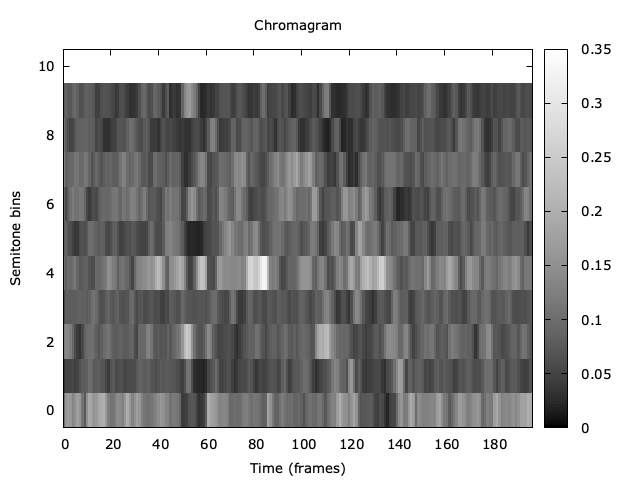

In [15]:
%%gnuplot

set macros

# Ignore the first line and the first two columns of the data file
DATA = "/Users/brinkley97/Documents/development/classes/csci_535_interpretable_emotion_recognition_from_audiovisual/opensmile/chroma2.csv"


set palette gray
set yrange [-0.5:11.5]
set xlabel 'Time (frames)'
set ylabel 'Semitone bins'
set title 'Chromagram'
unset key

# csv file with ; as delimiter
set datafile separator ';'

# Get number of frames and set xrange accordingly
stats DATA nooutput
set xrange [0:STATS_records]
set yrange [-0.5:10.5]

# Transpose data for plotting
plot DATA matrix u 2:1:3 w image

In [16]:
reformatted_spectrogram_df = reformat_df(spectrogram_df)
# reformatted_spectrogram_df
spectrogram_file_name = "spectrogram2.dat"
spectrogram_file = path + spectrogram_file_name
reformatted_spectrogram_df.to_csv(spectrogram_file, sep=';')
reformatted_spectrogram_df

,1.166666e-01,5.127192e-02,9.780104e-02,7.548714e-02,8.867323e-02,1.242342e-01,1.025194e-01,7.575766e-02
1,0.132720,0.077885,0.097584,0.067782,0.074447,0.087529,0.058250,0.071961
2,0.120155,0.075643,0.091484,0.057588,0.101254,0.090779,0.047243,0.071386
3,0.088294,0.077811,0.100808,0.046494,0.118264,0.092002,0.049955,0.086845
4,0.056494,0.077258,0.114433,0.034632,0.103184,0.110956,0.067190,0.094509
5,0.038663,0.081126,0.087264,0.037108,0.104406,0.108033,0.081680,0.082472
...,...,...,...,...,...,...,...,...
191,0.087135,0.060323,0.095482,0.080144,0.077711,0.077817,0.074148,0.056964
192,0.107945,0.061767,0.083045,0.080301,0.102280,0.057205,0.076444,0.048970
193,0.102479,0.059954,0.109801,0.059543,0.130107,0.065900,0.068633,0.055393
194,0.081679,0.067833,0.115283,0.035743,0.128707,0.086433,0.073797,0.060473


In [17]:
%gnuplot inline pngcairo size 640,480 font "Palatino,16"

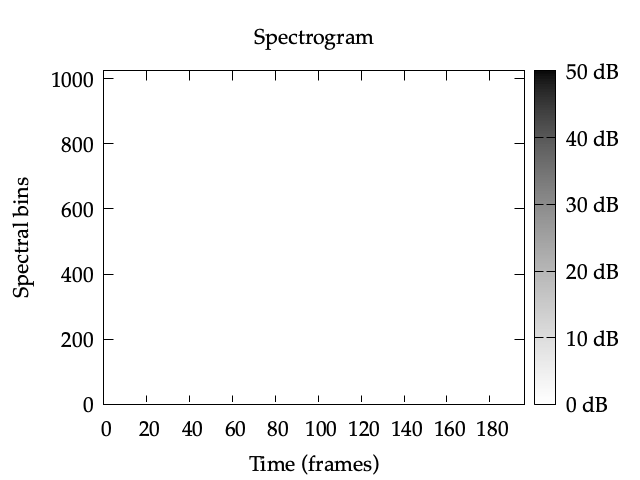

In [18]:
%%gnuplot

set macros

# Ignore the first line and the first two columns of the data file
DATA = "/Users/brinkley97/Documents/development/classes/csci_535_interpretable_emotion_recognition_from_audiovisual/opensmile/spectrogram2.csv"

set palette gray negative
set cbrange [0:50]
set yrange [0:1024]
set xlabel 'Time (frames)'
set ylabel 'Spectral bins'
set format cb '%g dB'
set title 'Spectrogram'
unset key

# CSV file with ; as delimiter
set datafile separator ';'

# Get number of frames and set xrange accordingly
stats DATA nooutput
set xrange [0:STATS_records]

# Transpose data for plotting
plot DATA u 2:1:3 matrix with image

In [50]:
# plt.specgram(reformatted_spectrogram_df, Fs=6, cmap="rainbow", NFFT=1024, noverlap=195)
# plt.title('Spectrogram Using matplotlib.pyplot.specgram() Method')
# plt.xlabel("DATA")
# plt.ylabel("TIME")
# plt.show()

In [20]:
prosodyAcf_df = pd.read_csv("../../csci_535_interpretable_emotion_recognition_from_audiovisual/opensmile/prosody.csv", delimiter=";")
prosodyAcf_df

,name,frameTime,voiceProb_sma,F0_sma,pcm_loudness_sma
0,'unknown',0.00,0.335664,0.0,0.053104
1,'unknown',0.01,0.365419,0.0,0.046728
2,'unknown',0.02,0.447321,0.0,0.066216
3,'unknown',0.03,0.481813,0.0,0.057239
4,'unknown',0.04,0.479565,0.0,0.076240
...,...,...,...,...,...
196,'unknown',1.96,0.340273,0.0,0.057766
197,'unknown',1.97,0.286923,0.0,0.056998
198,'unknown',1.98,0.316652,0.0,0.064681
199,'unknown',1.99,0.351376,0.0,0.082627


In [22]:
%gnuplot inline pngcairo size 840,580 noenhanced font "Verdana,10"

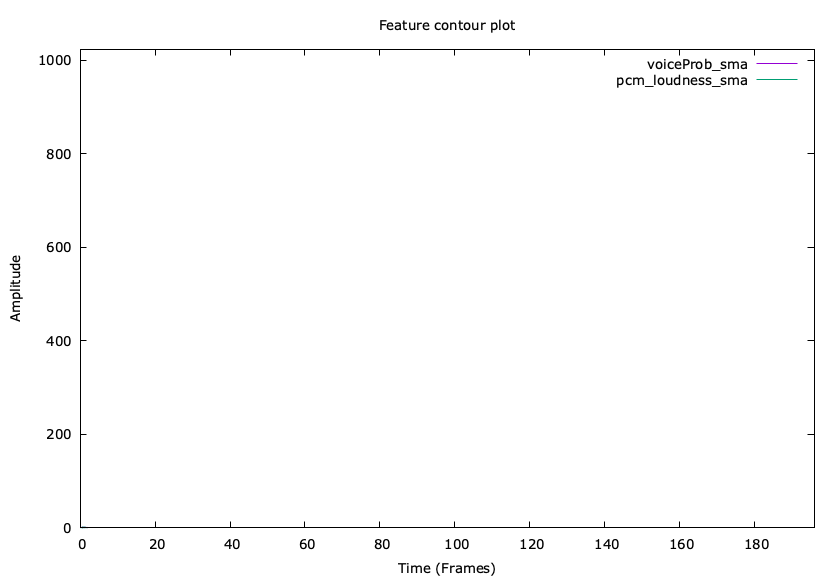

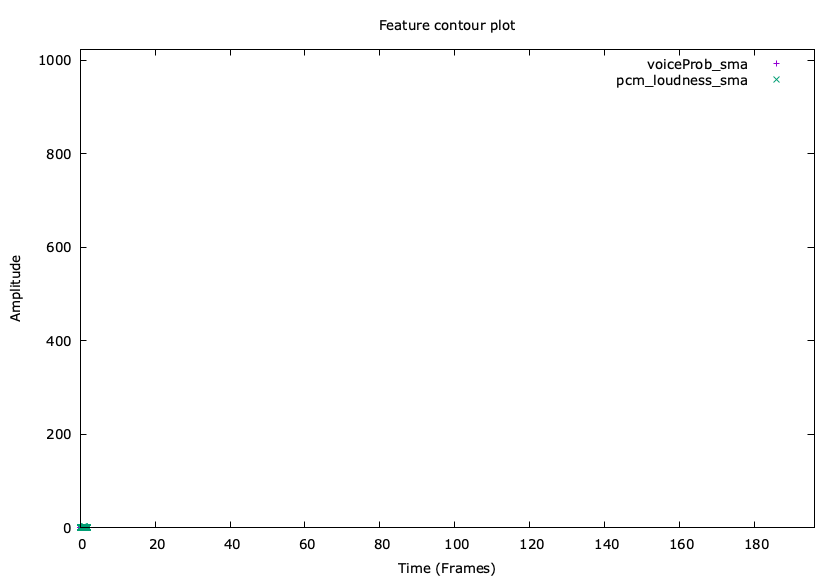

In [23]:
%%gnuplot

set macros

DATA = "/Users/brinkley97/Documents/development/classes/csci_535_interpretable_emotion_recognition_from_audiovisual/opensmile/prosody.csv"

# CSV file with ; as delimiter
set datafile separator ';'

set title 'Feature contour plot'
set ylabel 'Amplitude'
set xlabel 'Time (Frames)'

set key autotitle columnheader

set style line 1 \
    linecolor rgb '#0060ad' \
    linetype 1 linewidth 2 \
    pointtype 7 pointsize 1.5

plot DATA u 2:3:5 with lines, \
     ''                  u 2:5 with lines

plot DATA using 2:3 title 'voiceProb_sma', \
     DATA using 2:5 title 'pcm_loudness_sma'
# plot DATA u 2:3 w lines

In [27]:
time = prosodyAcf_df.loc[0:, "frameTime"]
voice = prosodyAcf_df.loc[0:, "voiceProb_sma"]
pcm = prosodyAcf_df.loc[0:, "pcm_loudness_sma"]
voice_pcm = pd.concat([time, voice, pcm], axis=1)
voice_pcm

,frameTime,voiceProb_sma,pcm_loudness_sma
0,0.00,0.335664,0.053104
1,0.01,0.365419,0.046728
2,0.02,0.447321,0.066216
3,0.03,0.481813,0.057239
4,0.04,0.479565,0.076240
...,...,...,...
196,1.96,0.340273,0.057766
197,1.97,0.286923,0.056998
198,1.98,0.316652,0.064681
199,1.99,0.351376,0.082627


<AxesSubplot: xlabel='frameTime'>

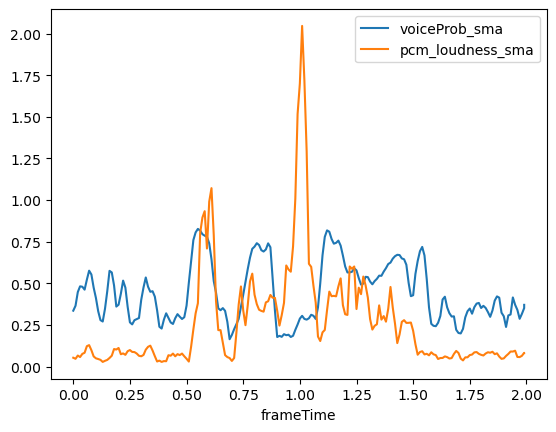

In [28]:
voice_pcm.plot(x="frameTime")

# References

1. [openSmile - Documentation](https://audeering.github.io/opensmile/index.html)
2. [openSmile - Visualising data with Gnuplot](https://audeering.github.io/opensmile/get-started.html#visualising-data-with-gnuplot)